### 행정구역별 의료기관 현황 분석하기

##### 데이터 준비 및 탐색

1. 데이터 파일 확인

In [1]:
import pandas as pd
import numpy as np

pd.set_option('mode.chained_assignment', None)

data = pd.read_csv('C:/DataMining/PublicHealth/공공보건의료기관현황.csv', index_col = 0, encoding = ' CP949', engine = 'python')
data.head() #작업 확인용 출력


,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN


2. 주소 정리하기

In [2]:
# 주소에서 시도, 군구 정보 분리
addr = pd.DataFrame(data['주소'].apply(lambda v: v.split()[:2]).tolist(), columns = ('시도', '군구'))
addr.head() #작업 확인용 출력

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시


3, 시도 이름에서 잘못된 내용이 있는지 확인

In [3]:
#유일한 값 찾기 = 중복제거. 시/도 에는 '도'와 광역시만 맞는 값
addr['시도'].unique() #고유값 확인

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

4. 잘못된 위치를 찾아서 값을 수정(창원시)

In [4]:
#['시도']컬럼 값이 '창원시'로 되어 있는 행 번호 검색
addr[addr['시도'] == '창원시']

,시도,군구
27,창원시,의창구
31,창원시,마산합포구3.15대로


In [5]:
#['경상남도', '창원시']로 수정
addr.iloc[27] = ['경상남도', '창원시']
addr.iloc[31] = ['경상남도', '창원시']

In [6]:
addr.iloc[27]

시도    경상남도
군구     창원시
Name: 27, dtype: object

In [7]:
addr.iloc[31]

시도    경상남도
군구     창원시
Name: 31, dtype: object

5. 잘못된 위치를 찾아서 값을 수정(경산시, 천안시)

In [8]:
addr[addr['시도'] == '경산시']

,시도,군구
47,경산시,경안로


In [9]:
addr.iloc[27] = ['경상남도', '경산시']

In [10]:
addr[addr['시도'] == '천안시']

,시도,군구
209,천안시,동남구
210,천안시,동남구


In [11]:
addr.iloc[209] = ['충청남도', '천안시'] 
addr.iloc[210] = ['충청남도', '천안시']

6. addr객체의 ['시도']컬럼 값에서 수정할 내용이 있는지 확인

In [12]:
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경산시', '경북', '인천광역시',
       '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도',
       '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시',
       '전북', '충청북도'], dtype=object)

7.‘경기’, ‘경남’과 같이 축약된 이름을 정확한 표준 이름으로 수정

In [13]:
#변경할 이름에 대한 ‘축약이름:표준이름’의 addr_aliases 딕셔너리를 정의
addr_aliases = {'경기':'경기도', '경남':'경상남도', '경북':'경상북도',
                    '충북':'충청북도', '서울시':'서울특별시', '부산특별시':
                    '부산광역시', '대전시':'대전광역시', '충남':'충청남도',
                    '전남':'전라남도', '전북':'전라북도'}

In [14]:
#Dictionary.get(찾는값, 없는경우 리턴값)
##addr_aliases 딕셔너리를 적용하여 [‘시도’] 컬럼의 값을 변경
addr['시도'] = addr['시도'].apply(lambda v: addr_aliases.get(v, v))

In [15]:
#addr 객체의 [‘시도’] 컬럼 고유값을 출력하여 빠짐없이 변경되었는지 확인
addr['시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '경산시', '인천광역시', '대구광역시', '전라남도',
       '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시',
       '충청남도', '울산광역시'], dtype=object)

8. ['군구'] 컬럼에서 정리할 사항이 있는지 탐색

In [16]:
addr['군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '경산시', '김해시', '양산시', '거창군',
       '창원시', '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시',
       '영주시', '상주시', '문경시', '경안로', '의성군', '청도군', '고령군', '칠곡군', '봉화군',
       '울릉군', '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구',
       '중구', '아란13길', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구',
       '화순군', '강동구', '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시',
       '홍천군', '양구군', '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군',
       '연수구', '노원구', '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시',
       '고흥군', '연제구', '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구',
       '양천구', '성동구', '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군',
       '무안군', '진도군', '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군',
       '정읍시', '남원시', '군산시', '고창군', '진안군', '제주시', '서귀포시', '천안시', '보령시',
       '서산

In [17]:
addr[addr['군구'] == '아란13길']

,시도,군구
75,제주특별자치도,아란13길


In [18]:
addr.iloc[75] = ['제주특별자치도', '제주시']

9. 행정구역별 공공보건의료기관의 수 구하기

In [19]:
#[‘시도’]와 [‘군구’] 컬럼 값을 연결하여 만든 값으로 addr 객체에 새로운 [‘시도군구’] 컬럼을 추가
addr['시도군구'] = addr.apply(lambda r: r['시도'] + ' ' + r['군구'], axis = 1)
addr.head()   #작업 확인용 출력

,시도,군구,시도군구
0,강원도,춘천시,강원도 춘천시
1,강원도,삼척시,강원도 삼척시
2,강원도,영월군,강원도 영월군
3,강원도,원주시,강원도 원주시
4,강원도,강릉시,강원도 강릉시


In [20]:
addr['count'] = 0 #컬럼추가
addr.head() #작업 확인용 출력

,시도,군구,시도군구,count
0,강원도,춘천시,강원도 춘천시,0
1,강원도,삼척시,강원도 삼척시,0
2,강원도,영월군,강원도 영월군,0
3,강원도,원주시,강원도 원주시,0
4,강원도,강릉시,강원도 강릉시,0


In [22]:
#[‘시도’], [‘군구’], [‘시도군구’] 컬럼을 기준으로 그룹을 만듬
#그룹별 원소의 개수를 구하여count( ) [‘count’] 컬럼에 저장
addr_group=pd.DataFrame(addr.groupby(['시도','군구','시도군구'],as_index=False).count())
addr_group.head() #작업 확인용 출력

,시도,군구,시도군구,count
0,강원도,강릉시,강원도 강릉시,4
1,강원도,동해시,강원도 동해시,1
2,강원도,삼척시,강원도 삼척시,1
3,강원도,속초시,강원도 속초시,1
4,강원도,양구군,강원도 양구군,1


10. 데이터 병합에 사용할 인덱스 설정

In [23]:
addr_group = addr_group.set_index("시도군구")
addr_group.head() #작업 확인용 출력

,시도,군구,count
시도군구,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1


##### 행정구역별 인구수 데이터 준비

In [30]:
population = pd.read_excel('C:/DataMining/PublicHealth/행정구역_시군구_별__성별_인구수_2.xlsx')
population.head() #작업 확인용 출력

,행정구역(시군구)별(1),행정구역(시군구)별(2),총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51414281,25621573,25792708
1,서울특별시,소계,9426404,4566299,4860105
2,서울특별시,종로구,141060,68170,72890
3,서울특별시,중구,120963,58699,62264
4,서울특별시,용산구,217756,104640,113116


In [31]:
#행정구역_시군구_별__성별_인구수_2.xlsx’ 파일을 population 객체로 로드하고, 출력하여 확인
population = population.rename(columns = {'행정구역(시군구)별(1)': '시도', '행정구역(시군구)별(2)': '군구'})
population.head() #작업 확인용 출력

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51414281,25621573,25792708
1,서울특별시,소계,9426404,4566299,4860105
2,서울특별시,종로구,141060,68170,72890
3,서울특별시,중구,120963,58699,62264
4,서울특별시,용산구,217756,104640,113116


In [32]:
#[‘군구’] 컬럼의 문자열 앞뒤에 포함된 띄어쓰기 공백을 모두 제거
for element in range(0,len(population)):
    population['군구'][element] = population['군구'][element].strip()

In [33]:
#[‘시도’]와 [‘군구’] 컬럼 값을 연결하여 새로운 [‘시도군구’] 컬럼에 추가
population['시도군구'] = population.apply(lambda r: r['시도'] + ' ' + r['군구'], axis = 1)
population.head()    #작업 확인용 출력

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
0,전국,소계,51414281,25621573,25792708,전국 소계
1,서울특별시,소계,9426404,4566299,4860105,서울특별시 소계
2,서울특별시,종로구,141060,68170,72890,서울특별시 종로구
3,서울특별시,중구,120963,58699,62264,서울특별시 중구
4,서울특별시,용산구,217756,104640,113116,서울특별시 용산구


In [34]:
#[‘군구’] 컬럼 값이 ‘소계’인 행은 필요 없으므로 제외
population = population[population.군구 != '소계']

#[‘시도군구’] 컬럼을 데이터프레임 병합에 사용할 인덱스로 설정
population = population.set_index("시도군구")

population.head() #작업 확인용 출력

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,141060,68170,72890
서울특별시 중구,서울특별시,중구,120963,58699,62264
서울특별시 용산구,서울특별시,용산구,217756,104640,113116
서울특별시 성동구,서울특별시,성동구,280240,136233,144007
서울특별시 광진구,서울특별시,광진구,336801,162209,174592


In [35]:
#addr_group과 population을 인덱스 기준으로 병합
addr_population_merge = pd.merge(addr_group,population, how = 'inner', left_index = True, right_index = True)

addr_population_merge.head() #작업 확인용 출력

,시도_x,군구_x,count,시도_y,군구_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,,,,
강원도 강릉시,강원도,강릉시,4,강원도,강릉시,210678,104419,106259
강원도 동해시,강원도,동해시,1,강원도,동해시,89186,45323,43863
강원도 삼척시,강원도,삼척시,1,강원도,삼척시,63487,32220,31267
강원도 속초시,강원도,속초시,1,강원도,속초시,82541,40885,41656
강원도 양구군,강원도,양구군,1,강원도,양구군,21351,11213,10138


In [37]:
#필요한 컬럼 4개만 추출하여 local_MC_Population 객체를 생성
local_MC_Population = addr_population_merge[['시도_x', '군구_x','count', '총인구수 (명)']]

local_MC_Population.head() #작업 확인용 출력

,시도_x,군구_x,count,총인구수 (명)
시도군구,,,,
강원도 강릉시,강원도,강릉시,4,210678
강원도 동해시,강원도,동해시,1,89186
강원도 삼척시,강원도,삼척시,1,63487
강원도 속초시,강원도,속초시,1,82541
강원도 양구군,강원도,양구군,1,21351


In [38]:
#컬럼 이름 변경
local_MC_Population = local_MC_Population.rename(columns = {'시도_x':'시도', '군구_x': '군구','총인구수 (명)': '인구수'})

MC_count = local_MC_Population['count'] #공공보건의료기관 개수

#10만명 당 의료기관 개수
#인구수 대비 공공보건의료기관 비율을 구하여 local_MC_Population의 [‘MC_ ratio’] 컬럼에 추가
local_MC_Population['MC_ratio'] = MC_count.div(local_MC_Population['인구수'], axis = 0)*100000
local_MC_Population.head() #작업 확인용 출력


,시도,군구,count,인구수,MC_ratio
시도군구,,,,,
강원도 강릉시,강원도,강릉시,4,210678,1.898632
강원도 동해시,강원도,동해시,1,89186,1.121252
강원도 삼척시,강원도,삼척시,1,63487,1.575126
강원도 속초시,강원도,속초시,1,82541,1.211519
강원도 양구군,강원도,양구군,1,21351,4.683621


###### 분석 모델 구축 및 시각화

1. 행정구역별 공공보건의료기관 수에 대한 바 차트 그리기

In [39]:
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
style.use('ggplot') #격자 설정(생략 가능)

from matplotlib import font_manager, rc

#폰트 설정 및 적용(생략가능)
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family = font_name)

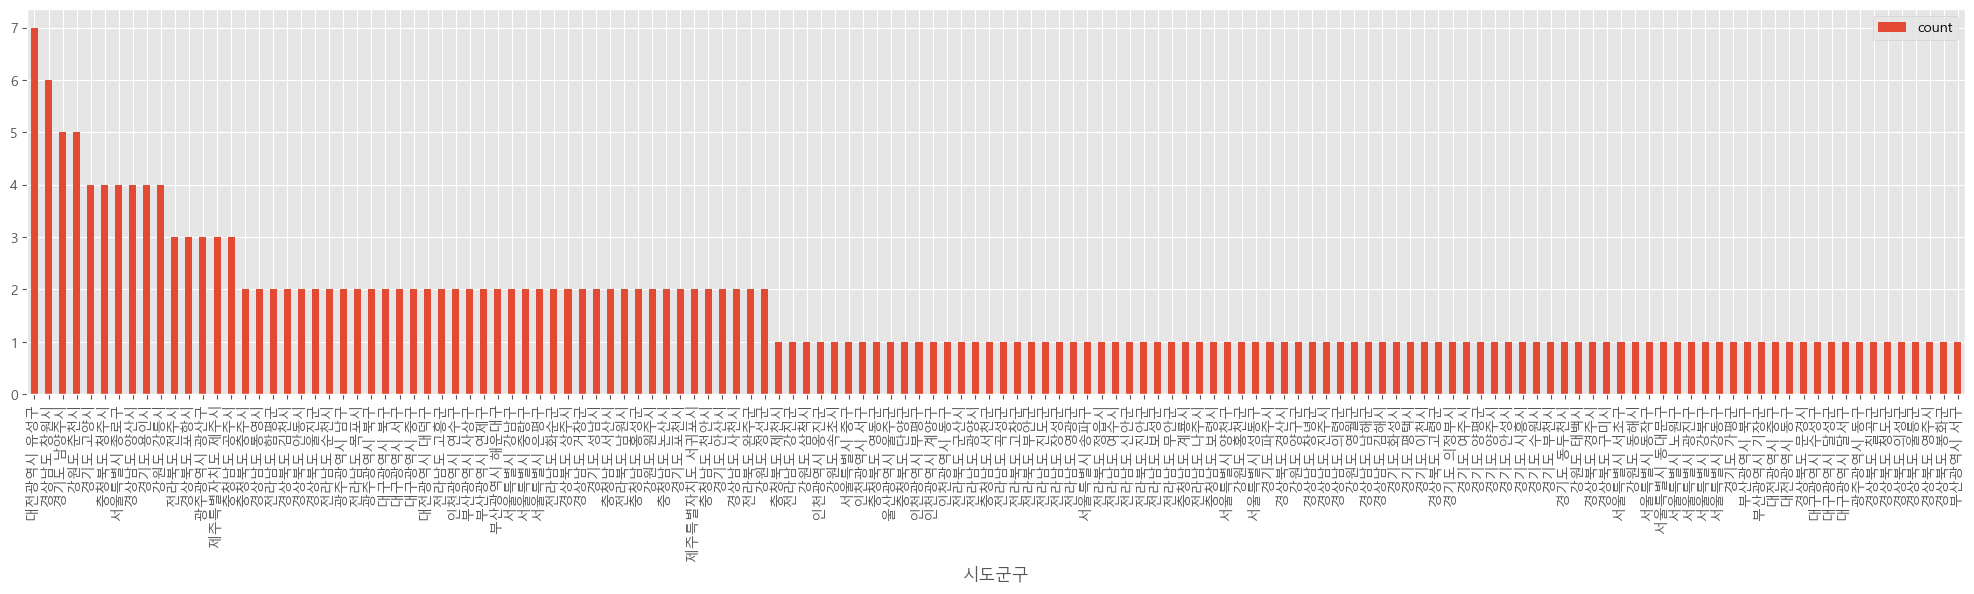

In [41]:
#local_MC_Population 객체의 [‘count’] 컬럼 값을 오름차순으로 정렬하여, 행정 구역별 공공보건의료기관 수에 대한 바 차트를 그림
MC_ratio = local_MC_Population[['count']]
MC_ratio = MC_ratio.sort_values('count', ascending = False)

plt.rcParams["figure.figsize"] = (25, 5)
MC_ratio.plot(kind = 'bar', rot = 90)
plt.show()

2. 행정구역별 인구수 대비 공공보건의료기관 비율에 대한 바 차트 그리기

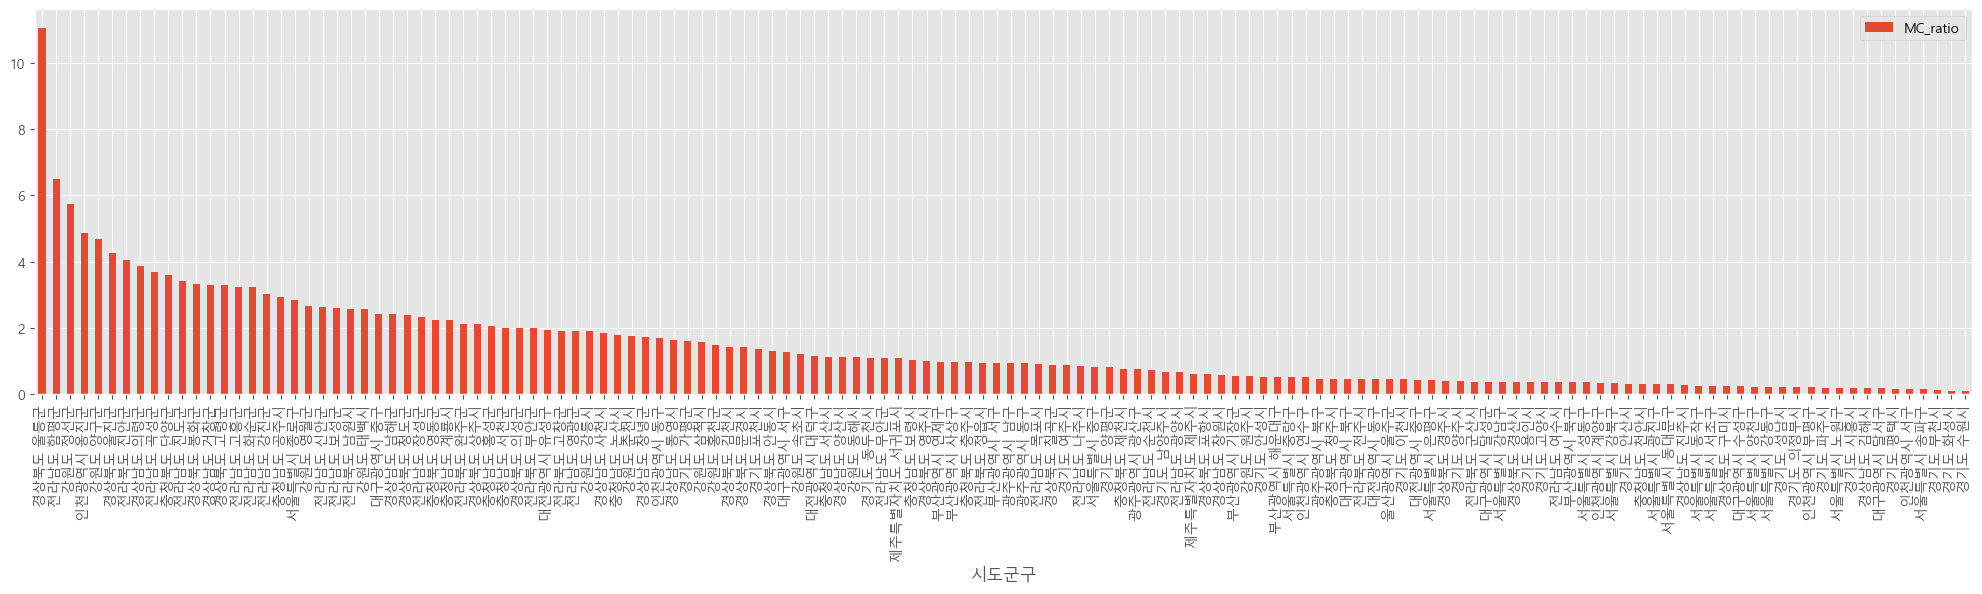

In [42]:
#local_MC_Population 객체의 [‘MC_ratio’] 컬럼 값을 오름차순으로 정렬하여, 행정구역별로 인구수 대비 공공보건의료기관 비율에 대한 바 차트를 그리기
MC_ratio = local_MC_Population[['MC_ratio']]
MC_ratio = MC_ratio.sort_values('MC_ratio', ascending = False)

plt.rcParams["figure.figsize"] = (25, 5)
MC_ratio.plot(kind = 'bar', rot = 90)
plt.show()

##### 블록맵으로 시각화

1. 데이터 준비하기

In [43]:
import os
path = os.getcwd()

In [45]:
data_draw_korea = pd.read_csv('C:/DataMining/PublicHealth/data_draw_korea.csv',index_col = 0, encoding = 'UTF-8', engine = 'python')

data_draw_korea.head() #작업 확인용 출력

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


2. 행정구역 매핑

In [46]:
#[‘광역시도’]와 [‘행정구역’] 컬럼 값을 연결하여 새로운 [‘시도군구’] 컬럼으로 추가
data_draw_korea['시도군구'] = data_draw_korea.apply(lambda r: r['광역시도'] + ' ' + r['행정구역'], axis = 1)

#[‘시도군구’] 컬럼을 데이터프레임 병합에 사용할 인덱스로 설정
data_draw_korea = data_draw_korea.set_index("시도군구")

data_draw_korea.head() #작업 확인용 출력


,인구수,shortName,x,y,면적,광역시도,행정구역
시도군구,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시


In [48]:
#data_draw_korea와 local_MC_Population을 외부병합으로how='outer' 병합
data_draw_korea_MC_Population_all = pd.merge(data_draw_korea,local_MC_Population, how = 'outer', left_index = True, right_index = True)

data_draw_korea_MC_Population_all.head()

,인구수_x,shortName,x,y,면적,광역시도,행정구역,시도,군구,count,인구수_y,MC_ratio
시도군구,,,,,,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시,강원도,강릉시,4.0,210678.0,1.898632
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군,NaN,NaN,NaN,NaN,NaN
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시,강원도,동해시,1.0,89186.0,1.121252
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시,강원도,삼척시,1.0,63487.0,1.575126
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시,강원도,속초시,1.0,82541.0,1.211519


3. 블록맥으로 시각화

In [49]:
#블록맵의 행정구역 경계선을 그리기 위해 행정구역의 블록 위치인 x, y 데이터를 정의
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]

In [57]:
def draw_blockMap(blockedMap, targetData, title, color ):
    #(최대-최소)*25%+최소 = 하위 25%
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

    datalabel = targetData #오른쪽 컬러 바 표시

    #히트맵 생성을 위한 pcolor 파라미터 입력용 데이터
    vmin = min(blockedMap[targetData]) 
    vmax = max(blockedMap[targetData]) 

    #데이터 열 중에서 두 개의 열을 각각 행 인덱스, 열 인덱스로 사용하여 데이터를 조회하여 펼쳐놓은 것
    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    
    #ma.masked_where(조건,x):조건이 True인 경우 x를 마스킹한 배열로 반환
    #히트 맵에서 제외되는 부분
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(8, 13))
    plt.title(title)
    
    #Vmin : 최소값, vmax=최대값, 츠메: 컬러맵, edgecolor : 테두리 컬러', linewidth=테두리 두께
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=color, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        #하위 25%보다 큰 데이터는 검은색으로 글자를 쓴다(생략가능)
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
    
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'): #세종특별자치시가 아닌 나머지 광역시
            dispname = '{}\n{}'.format(row['광역시도'][:2], row['행정구역'][:-1]) #문자열 format 방식 ex)인천광역시 연수구 > 인천/연수
            if len(row['행정구역']) <= 2:
                #문자열이 너무 짧아진 경우 다시 끝을 붙여줌 ex)울산 남 > 울산 남구
                dispname += row['행정구역'][-1]
        else:
            dispname = row['행정구역'][:-1]
            
        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        #빈칸 기준으로 자르고 마지막 글자의 길이가 3이상이면 폰트 축소
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        #글자,x, y, 굵기, 폰트 크기, 가로정렬, 세로정렬, 색상, 줄간격
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
    
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        #*은 Unpacking : 풀어헤치기
        #Zip:자료형의 각각의 요소를 나눈 후 순서대로 묶음
        ys, xs = zip(*path) #zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis() #invert_yaxis : y좌표가 이미지와 그래프가 반대이므로 역전시킴
    plt.gca().set_aspect(1) #set_aspect : 가로 세로 비율
    plt.axis('off') #Axis: 눈금 제거
    
    #오른쪽 컬러 바(게이지) 표시(생략가능) / shrink : 컬러바의 크기, aspect : 종횡비
    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.savefig('C:/DataMining/PublicHealth' + 'blockMap_' + targetData + '.png')                  
    plt.show() 

4. 행정구역별 공공보건의료기관 수를 블록맵으로 시각화

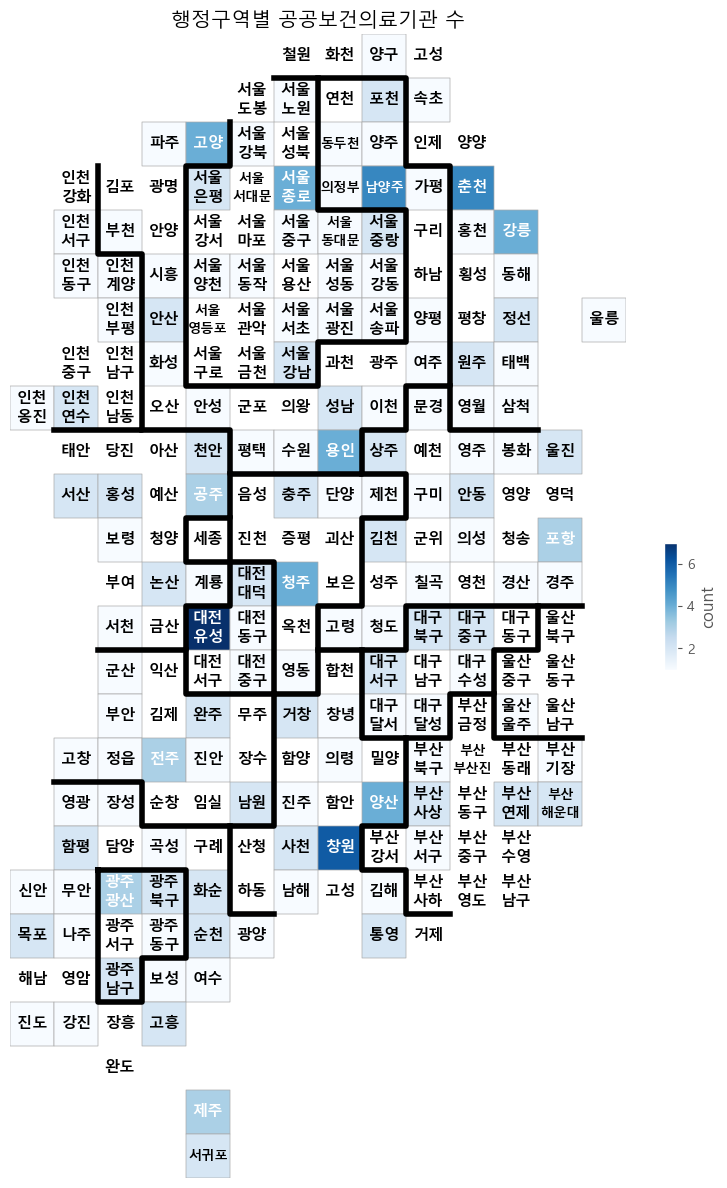

In [58]:
draw_blockMap(data_draw_korea_MC_Population_all, 'count', '행정구역별 공공보건의료기관 수', 'Blues')

5. 인구수 대비 공공보건의료기관 비율 블록맵으로 시각화

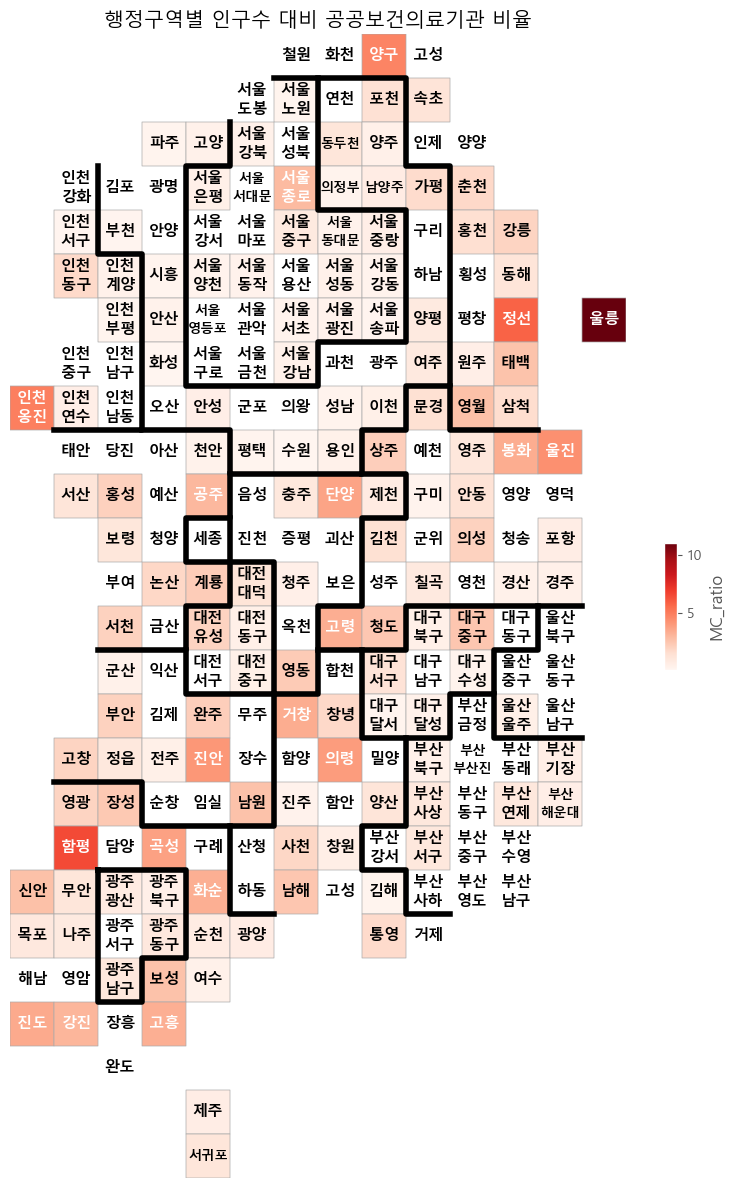

In [59]:
draw_blockMap(data_draw_korea_MC_Population_all, 'MC_ratio', '행정구역별 인구수 대비 공공보건의료기관 비율', 'Reds')